In [72]:
import pickle
import json
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
PATH_NO_AUGMENT = "results/results_20190611T0000_small-bi"
PATH_AUGMENT = "results/results_20190611T0108_small-bi-augment"
PATH_ONLY_LSTM = "results/results_20190611T0138_only-lstm-augment"
PATH_FINAL = "results/results_20190611T0717_small-bi-augment-2x"

sns.set()


In [87]:
with open(PATH_NO_AUGMENT + '/history.pkl', "rb") as f:
    data_no_augment_loss = pickle.load(f)
    
with open(PATH_AUGMENT + '/history.pkl', "rb") as f:
    data_augment_loss = pickle.load(f)
    
with open(PATH_ONLY_LSTM + '/history.pkl', 'rb') as f:
    data_only_lstm_loss = pickle.load(f)
    
with open(PATH_FINAL + '/history.pkl', 'rb') as f:
    data_final_loss = pickle.load(f)
    
with open(PATH_FINAL + '/evaluation.pkl', 'rb') as f:
    data_final_evaluation = pickle.load(f)

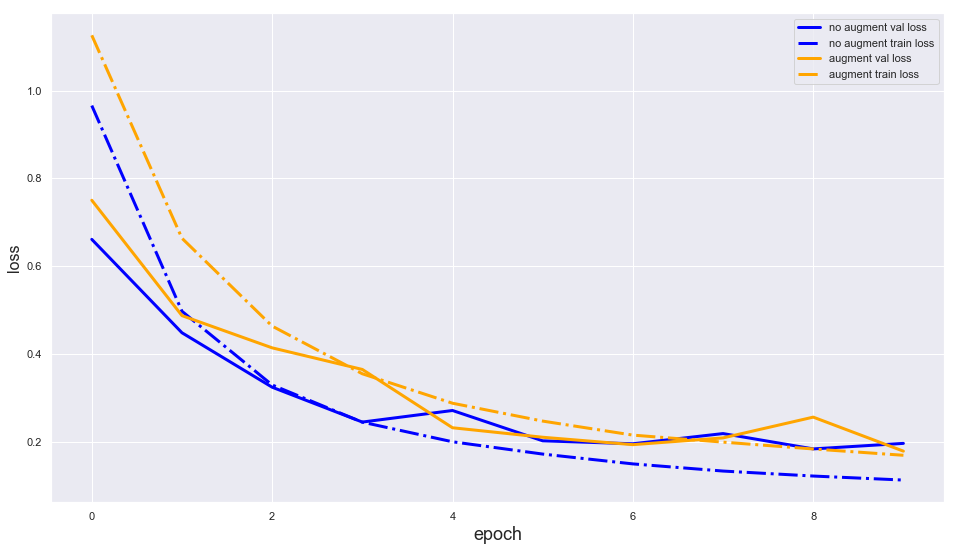

In [97]:
##### augment vs no augment
plt.figure(figsize=(16, 9))
sns.set()

plt.plot(data_no_augment_loss['val_loss'], color='blue', linewidth=3, label='no augment val loss')
plt.plot(data_no_augment_loss['loss'], color='blue', linewidth=3, linestyle='-.', label='no augment train loss')

plt.plot(data_augment_loss['val_loss'], color='orange', linewidth=3, label='augment val loss')
plt.plot(data_augment_loss['loss'], color='orange', linewidth=3, linestyle='-.', label='augment train loss')

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=16)
plt.legend()

plt.savefig('plots/augement-vs-no.png')

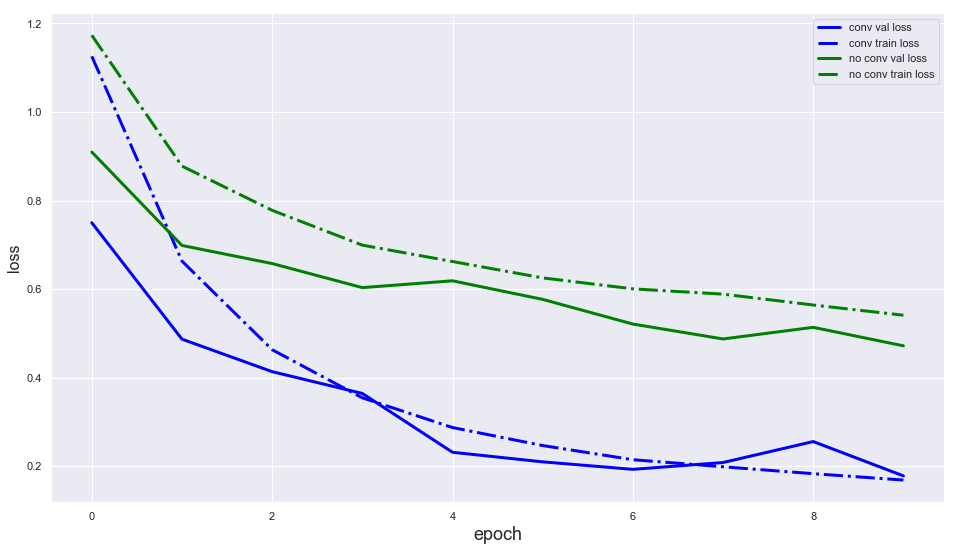

In [98]:
##### conv vs no
plt.figure(figsize=(16, 9))
sns.set()

plt.plot(data_augment_loss['val_loss'], color='blue', linewidth=3, label='conv val loss')
plt.plot(data_augment_loss['loss'], color='blue', linewidth=3, linestyle='-.', label='conv train loss')

plt.plot(data_only_lstm_loss['val_loss'], color='green', linewidth=3, label='no conv val loss')
plt.plot(data_only_lstm_loss['loss'], color='green', linewidth=3, linestyle='-.', label='no conv train loss')

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=16)
plt.legend()


plt.savefig('plots/conv-vs-no.png')

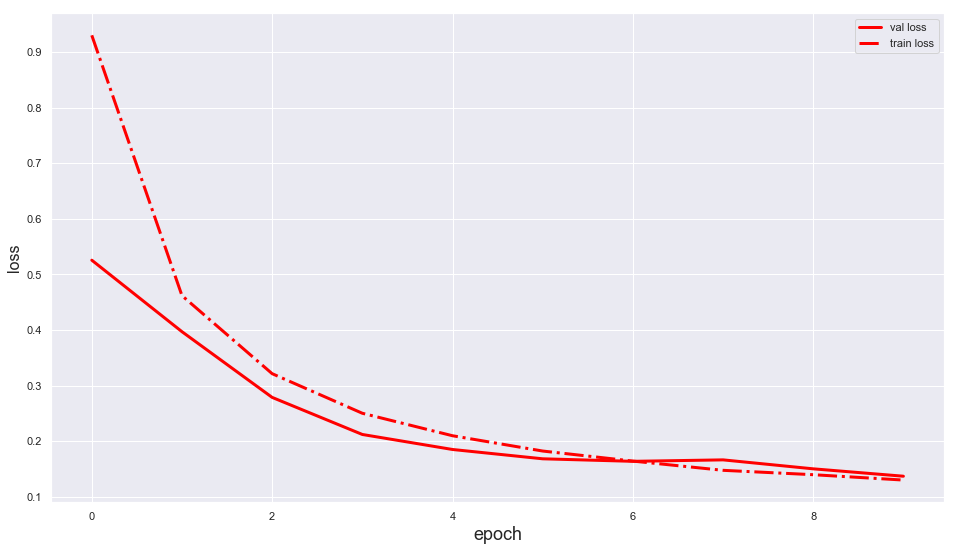

In [99]:
##### final loss
plt.figure(figsize=(16, 9))
sns.set()

plt.plot(data_final_loss['val_loss'], color='red', linewidth=3, label='val loss')
plt.plot(data_final_loss['loss'], color='red', linewidth=3, linestyle='-.', label='train loss')


plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=16)
plt.legend()


plt.savefig('plots/final-loss.png')

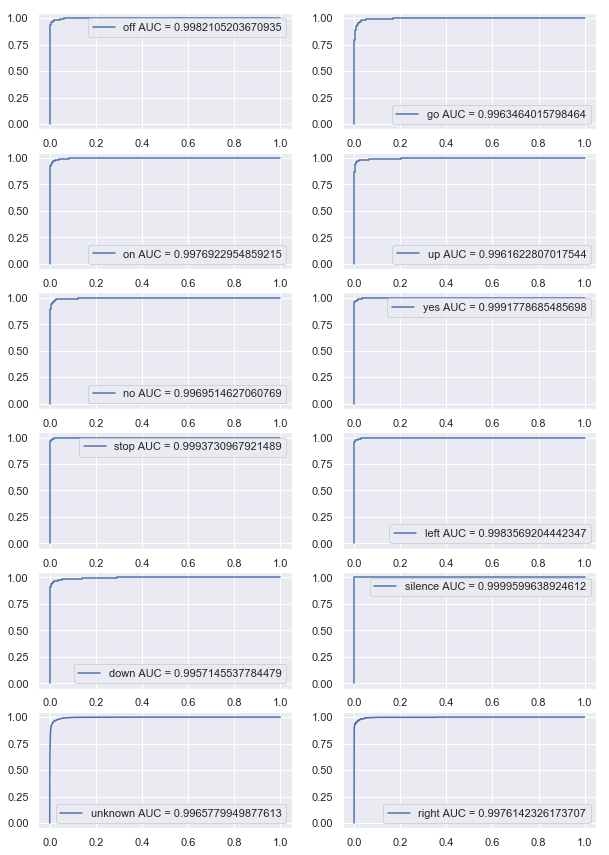

In [96]:
#### final auc

plt.figure(figsize=(10, 15))

classes = {'off': 0,
 'go': 1,
 'on': 2,
 'up': 3,
 'no': 4,
 'yes': 5,
 'stop': 6,
 'left': 7,
 'down': 8,
 'silence': 9,
 'unknown': 10,
 'right': 11}

index_to_class = {v: k for k, v in classes.items()}
probs = data_final_evaluation['classes_probs']
true_labels = data_final_evaluation['classes_true_labels']

for i, prob_class in enumerate(probs):
    fpr, tpr, thresholds = roc_curve(true_labels[i], prob_class)
    auc_class = roc_auc_score(true_labels[i], prob_class)
    plt.subplot(6, 2, i + 1)
    plt.plot(fpr, tpr, label=f"{index_to_class[i]} AUC = {auc_class}")
    plt.legend()
    
plt.savefig('plots/roc_auc.png')

In [74]:
index_to_class

{0: 'off',
 1: 'go',
 2: 'on',
 3: 'up',
 4: 'no',
 5: 'yes',
 6: 'stop',
 7: 'left',
 8: 'down',
 9: 'silence',
 10: 'unknown',
 11: 'right'}